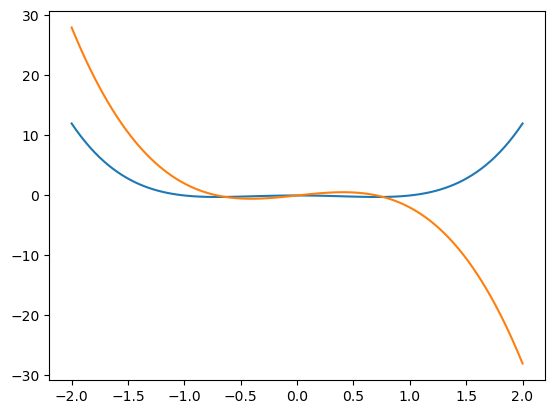

In [ ]:
import propagators
import energy_landscapes
import long_simulation
import weighted_ensemble_2
import numpy as np
import MSM_methods
import analysis

import matplotlib.pyplot as plt
import importlib

importlib.reload(energy_landscapes)

#methods for fast print debugging
def p(x):
    print(x)
def pl(x):
    print(len(x))
def ps(x):
    print(x.shape)

kT = 1
dt = 0.001
nbins = 160
save_period = 100 #in steps; used to set nsteps below
n_bootstrap = 3

system1 = energy_landscapes.unit_double_well()
system1.plot_quantity(system1.potential)
system1.plot_quantity(system1.F)
#system1.analysis_bins(40)


0
simulation steps:
 Aggregate: 100000000 
 Molecular: 100000
eigenvector converged to within 10^-12 after 0 rounds
1
simulation steps:
 Aggregate: 100000000 
 Molecular: 100000
eigenvector converged to within 10^-12 after 0 rounds
2
simulation steps:
 Aggregate: 100000000 
 Molecular: 100000
eigenvector converged to within 10^-12 after 0 rounds
3
simulation steps:
 Aggregate: 100000000 
 Molecular: 100000
eigenvector converged to within 10^-12 after 0 rounds
4
simulation steps:
 Aggregate: 100000000 
 Molecular: 100000
eigenvector converged to within 10^-12 after 0 rounds
5
simulation steps:
 Aggregate: 100000000 
 Molecular: 100000
eigenvector converged to within 10^-12 after 0 rounds
6
simulation steps:
 Aggregate: 100000000 
 Molecular: 100000
eigenvector converged to within 10^-12 after 0 rounds
7
simulation steps:
 Aggregate: 100000000 
 Molecular: 100000
eigenvector converged to within 10^-12 after 0 rounds
8
simulation steps:
 Aggregate: 100000000 
 Molecular: 100000
eigenvecto

(array([2., 0., 2., 0., 0., 2., 1., 1., 1., 1.]),
 array([ 989.09947207,  990.76312209,  992.42677211,  994.09042213,
         995.75407215,  997.41772217,  999.08137219, 1000.74502221,
        1002.40867224, 1004.07232226, 1005.73597228]),
 <BarContainer object of 10 artists>)

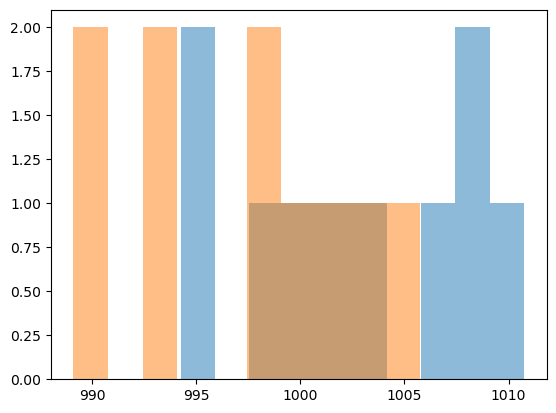

In [3]:
importlib.reload(MSM_methods)
importlib.reload(long_simulation)

mfpts_long_raw = []
mfpts_long_hamsm = []

for bs in range(n_bootstrap):

    print(bs)

    x_init_coord = system1.standard_init_coord
    nsteps = 100000
    n_parallel = 1000
    lag_time = 1

    long_trjs = long_simulation.run_long_parallel_simulations(propagators.propagate, system1, kT, x_init_coord, dt, nsteps, save_period, n_parallel)
    print(f"simulation steps:\n Aggregate: {nsteps*n_parallel} \n Molecular: {nsteps}")


    #------------------------------------------------------------------------------------------
    #non-MSM analysis
    x, p = long_simulation.estimate_eq_pops_histogram(long_trjs, system1, nbins)
    transitions, mfpts = long_simulation.calc_mfpt(system1.macro_class, system1.n_macrostates, save_period, long_trjs)
    if n_bootstrap == 1:
        metrics = analysis.landscape_comparison(system1, kT, x, p, metrics = ["maew"])
        analysis.print_mfpts_2states(mfpts)

    inter_well_mpfts = [mfpts[0,1], mfpts[1,0]]
    mfpts_long_raw.append(np.mean(inter_well_mpfts))


    #------------------------------------------------------------------------------------------
    #MSM analysis
    # x_msm, eqp_msm, mfpts_msm = long_simulation.msm_analysis(long_trjs, nbins, system1.macro_class, system1.n_macrostates(), save_period, lag_time=lag_time, show_TPM=False)
    # metrics = analysis.landscape_comparison(system1, kT, x_msm, eqp_msm, metrics = ["maew"])

    # analysis.print_mfpts_2states(mfpts_msm)


    #TODO as a more stringent test break this into two cells: 
    # In the first calculate MFPTs from a single long trajectory by brute force, 
    # and in the second calculate them from many very short (too short to get accurate brute force results) ones with an MSM.
    # if you build an MSM from trajectories so long the system has equilibrated by brute force you could get accurate MFPTs even if there's something wrong with MSM construction
    #------------------------------------------------------------------------------------------
    #haMSM analysis
    #note that lag time is measured in saved frames
    ha_transitions = long_simulation.get_ha_transitions(long_trjs, nbins, system1, lag_time=1)
    x_hamsm, eqp_hamsm, x_ens, p_ens, mfpts_hamsm = analysis.hamsm_analysis(ha_transitions, nbins, system1, save_period, lag_time=1, show_TPM=False)
    #long_simulation.hamsm_analysis(long_trjs, nbins, system1, save_period, lag_time=1, show_TPM=False)
    if n_bootstrap == 1:
        metrics = analysis.landscape_comparison(system1, kT, x_hamsm, eqp_hamsm, metrics = ["maew"], ensemble_data = [x_ens, p_ens])
        analysis.print_mfpts_2states(mfpts_hamsm)

    inter_well_mpfts_hamsm = [mfpts_hamsm[0,1], mfpts_hamsm[1,0]]
    mfpts_long_hamsm.append(np.mean(inter_well_mpfts_hamsm))

plt.hist(mfpts_long_raw, alpha=0.5)
plt.hist(mfpts_long_hamsm, alpha=0.5)


# WE simulation

Each bin can hold up to 3 walkers, for a total of up to 486 walkers
0
400
800
1200
1600
2000
2400
2800
3200
3600
simulation steps:
 Aggregate: 31448700 
 Molecular: 400000
eigenvector converged to within 10^-12 after 0 rounds
Each bin can hold up to 3 walkers, for a total of up to 486 walkers
0
400
800
1200
1600
2000
2400
2800
3200
3600
simulation steps:
 Aggregate: 31454400 
 Molecular: 400000
eigenvector converged to within 10^-12 after 0 rounds
Each bin can hold up to 3 walkers, for a total of up to 486 walkers
0
400
800
1200
1600
2000
2400
2800
3200
3600
simulation steps:
 Aggregate: 31222200 
 Molecular: 400000
eigenvector converged to within 10^-12 after 0 rounds
Each bin can hold up to 3 walkers, for a total of up to 486 walkers
0
400
800
1200
1600
2000
2400
2800
3200
3600
simulation steps:
 Aggregate: 31768100 
 Molecular: 400000
eigenvector converged to within 10^-12 after 0 rounds
Each bin can hold up to 3 walkers, for a total of up to 486 walkers
0
400
800
1200
1600
2000
240

(array([1., 1., 1., 0., 1., 0., 1., 1., 2., 2.]),
 array([ 985.40858694,  987.33732248,  989.26605803,  991.19479357,
         993.12352911,  995.05226465,  996.98100019,  998.90973573,
        1000.83847127, 1002.76720681, 1004.69594235]),
 <BarContainer object of 10 artists>)

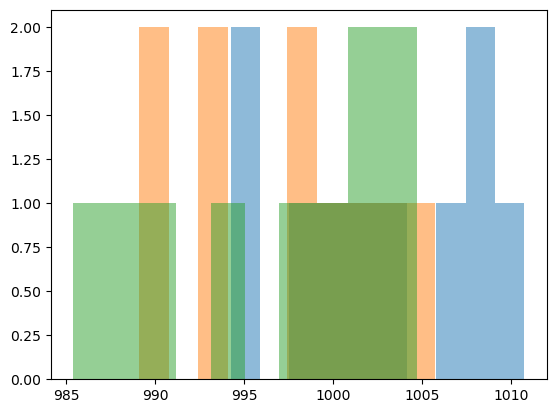

In [4]:

mfpts_we_hamsm = []

for bs in range(n_bootstrap):
    #Weighted ensemble (WE) parameters and inputs

    N = 500             #total number of walkers within binrange
    #nbins = 40         #total number of bins within binrange 
    #nbins should match the value above, at least for analysis; make a separate n_bins_analysis variable

    walkers_per_bin = round(N/nbins)
    print(f"Each bin can hold up to {walkers_per_bin} walkers, for a total of up to {walkers_per_bin*(nbins+2)} walkers")

    binrange = system1.standard_analysis_range 

    #progress coordinate range within which to bin simulations
                        #this should extend well past the stall point for examination of the WE stall force
                        #the area past either end of binrange is a bin extending to either + or - inf, yielding a total of nbins+2 bins
    n_macrostates=2
            
    nsteps = save_period        #round length; to match long simulations since MFPT = f(lag time)
    nrounds = 4000              #number of WE rounds to run

    x_init_val = system1.standard_init_coord

    #run weighted ensemble with brownian dynamics
    #put this on multiple lines
    x_init, e_init, w_init, binbounds, xtrj, etrj, wtrj, transitions, hamsm_transitions, n_trans_by_round \
    = weighted_ensemble_2.weighted_ensemble_start(\
                        x_init_val,\
                        nrounds,\
                        nbins,\
                        walkers_per_bin,\
                        binrange, propagators.propagate_save1,\
                        [system1, kT, dt, nsteps],\
                        system1.ensemble_class,\
                        n_macrostates,\
                        ha_binning=False)


    aggregate_walkers = len([j for i in xtrj for j in i])
    print(f"simulation steps:\n Aggregate: {nsteps*aggregate_walkers} \n Molecular: {nsteps*nrounds}")

    x, p, xs, es = weighted_ensemble_2.landscape_recovery(xtrj, wtrj, binbounds, transitions, hamsm_transitions, n_trans_by_round, nrounds, n_macrostates, system1.potential, system1.macro_class, kT)

    x_hamsm, eqp_hamsm, x_ens, p_ens, mfpts_hamsm = analysis.hamsm_analysis(hamsm_transitions, nbins, system1, nsteps, lag_time=1, show_TPM=False)

    if n_bootstrap == 1:
        metrics = analysis.landscape_comparison(system1, kT, x_hamsm, eqp_hamsm, metrics = ["maew"], ensemble_data = [x_ens, p_ens])
        analysis.print_mfpts_2states(mfpts_hamsm)

    inter_well_mpfts_we_hamsm = [mfpts_hamsm[0,1], mfpts_hamsm[1,0]]
    mfpts_we_hamsm.append(np.mean(inter_well_mpfts_we_hamsm))


plt.hist(mfpts_long_raw, alpha=0.5)
plt.hist(mfpts_long_hamsm, alpha=0.5)
plt.hist(mfpts_we_hamsm, alpha=0.5)


In [ ]:
#IDEA: can populate bins by resuming previously-terminated walkers, especially deeply-branching ones; could include these 'ghost' walkers in RMSD comparisons as well